In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

In [5]:
train_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"
test_dir ="/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"

Training set: (2886, 28, 28, 1), Labels: (2886, 10)
Testing set: (2886, 28, 28, 1), Labels: (2886, 10)


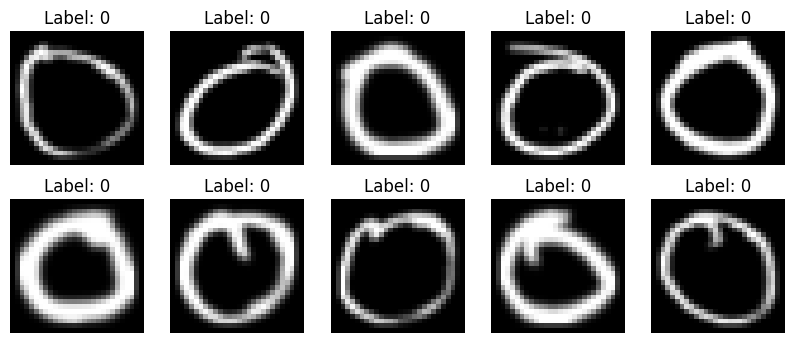

In [6]:
# Define image size
img_height, img_width = 28, 28

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")  # Fixed incorrect quote
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.show()


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to match model input shape (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
# Input layer
  inputs = keras.Input(shape=input_shape)
# Flatten layer
  x = keras.layers.Flatten()(inputs)
# Hidden layers
  x = keras.layers.Dense(64, activation="sigmoid")(x)
  x = keras.layers.Dense(128, activation="sigmoid")(x)
  x = keras.layers.Dense(256, activation="sigmoid")(x)
# Output layer
  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
# Create model
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
functional_model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
batch_size = 128
epochs = 2000
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

history = functional_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

Epoch 1/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9851 - loss: 0.0571 - val_accuracy: 0.9731 - val_loss: 0.0965
Epoch 2/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9852 - loss: 0.0575 - val_accuracy: 0.9727 - val_loss: 0.0966
Epoch 3/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9844 - loss: 0.0580 - val_accuracy: 0.9731 - val_loss: 0.0965
Epoch 4/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9849 - loss: 0.0579 - val_accuracy: 0.9729 - val_loss: 0.0963
Epoch 5/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9848 - loss: 0.0590 - val_accuracy: 0.9732 - val_loss: 0.0965
Epoch 6/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9847 - loss: 0.0562 - val_accuracy: 0.9731 - val_loss: 0.0965
Epoch 7/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0575 - val_accuracy: 0.9729 - val_loss: 0.0964
Epoch 8/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9839 - loss: 0.0584 - 

<function matplotlib.pyplot.show(close=None, block=None)>

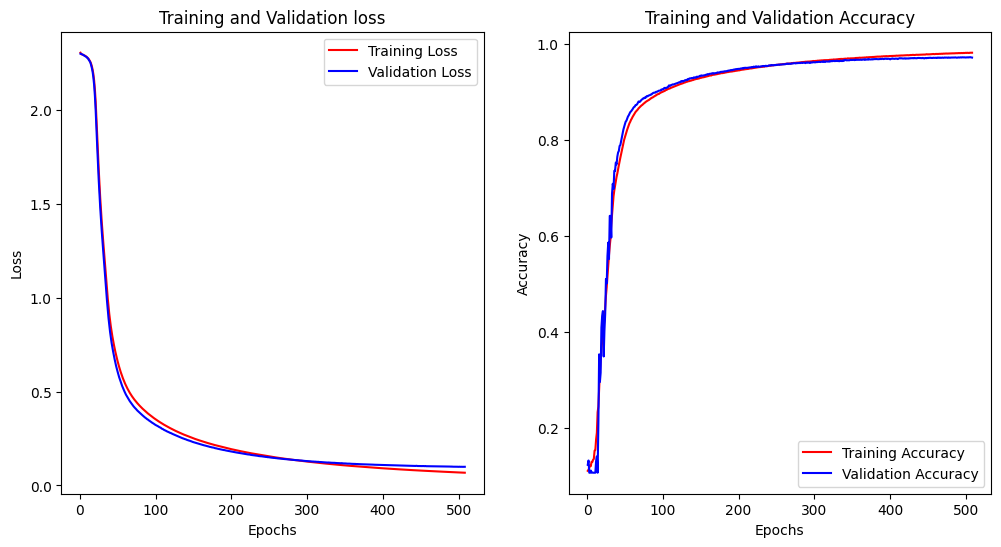

In [12]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

#plotting training and validation
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(range(1, len(train_loss)+1), train_loss, label = "Training Loss", color="red")
plt.plot(range(1, len(val_loss)+1), val_loss, label = "Validation Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, len(train_acc)+1), train_acc, label = "Training Accuracy", color="red")
plt.plot(range(1, len(val_acc)+1), val_acc, label = "Validation Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show

In [13]:
#Test data prediction
predictions = functional_model.predict(x_test)

#convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

#check the first predictions
print("Predicted label for first image: ", predicted_labels[0])
print("Actual label for first image:", np.argmax(y_test[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image:  7
Actual label for first image: 7


In [14]:
functional_model.save("mnist_fully_functional_model.h5")

In [15]:
loaded_model = tf.keras.models.load_model("mnist_fully_functional_model.h5")